In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image

In [2]:
l = 100
x, y = np.indices((l, l))

In [3]:
x

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [97, 97, 97, ..., 97, 97, 97],
       [98, 98, 98, ..., 98, 98, 98],
       [99, 99, 99, ..., 99, 99, 99]])

In [4]:
y

array([[ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       ...,
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99]])

In [5]:
center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

In [6]:
circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

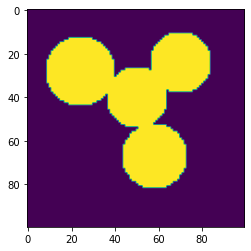

In [7]:
img = circle1 + circle2 + circle3 + circle4

plt.imshow(img);

In [8]:
mask = img.astype(bool)
img = img.astype(float)
mask.shape, img.shape

((100, 100), (100, 100))

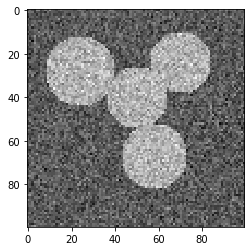

In [10]:
img += 1 + 0.2 * np.random.randn(*img.shape)

plt.imshow(img, interpolation='nearest', cmap='gray');

In [11]:
graph = image.img_to_graph(img, mask=mask) # graph of pixel-to-pixel gradient connections in the image
print(graph) 

  (0, 1)	0.6592647007687282
  (1, 2)	0.3805671419235508
  (2, 3)	0.1872690918147537
  (3, 4)	0.8127557023617058
  (4, 5)	0.3611909455343145
  (5, 6)	0.8833767910117785
  (6, 7)	0.0638031186701209
  (7, 8)	0.11269932531517801
  (8, 9)	0.19176160167610234
  (9, 10)	0.015330572595285918
  (11, 12)	0.03434001937685238
  (12, 13)	0.04645246279237103
  (13, 14)	0.36244559526798614
  (14, 15)	0.09786408617897369
  (15, 16)	0.6016724667985422
  (16, 17)	1.1711072805762357
  (17, 18)	0.36677826137664793
  (18, 19)	0.5647279606486482
  (19, 20)	0.015410584363753532
  (20, 21)	0.945875774182038
  (21, 22)	0.3000315206418329
  (22, 23)	0.16411731955729936
  (23, 24)	0.09988653139230541
  (24, 25)	0.7488724654757659
  (26, 27)	0.18523782479790007
  :	:
  (2653, 2653)	3.330521791717639
  (2654, 2654)	3.056357038256962
  (2655, 2655)	3.4285097688085404
  (2656, 2656)	3.1446532319043583
  (2657, 2657)	2.647597091285847
  (2658, 2658)	3.4721831159503735
  (2659, 2659)	3.090135761190017
  (2660, 2660)	3

In [12]:
graph.shape

(2678, 2678)

In [13]:
graph.data

array([0.6592647 , 0.38056714, 0.18726909, ..., 3.42797375, 2.54454774,
       3.45652702])

In [14]:
graph.data.shape

(13004,)

In [16]:
labels = spectral_clustering(graph, n_clusters=4)
labels

array([2, 2, 2, ..., 3, 3, 3])

In [17]:
label_im = -np.ones(img.shape)
label_im

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [18]:
label_im[mask] = labels
label_im[mask]

array([2., 2., 2., ..., 3., 3., 3.])

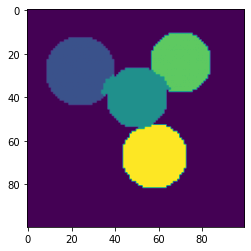

In [19]:
plt.imshow(label_im);